# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**1.1. Импортировать библиотеку pandas. Считайть данные из csv-файла в датафрейм и сохранить в переменную `data`.**

In [3]:
import pandas as pd

In [4]:
# прочитаем csv-файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**1.2 Изучить общую информацию о полученном датафрейме.**

In [5]:
data.head(20) # вывод первых 20 строчек датафрейма data на экран.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.info() #Вывод основной информации о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3 Проверить на дубликаты.**

In [7]:
data.duplicated().sum() # проверка датасета на дубликаты методом duplicated() и sum()

0

**1.4 Построить общую гистограмму для всех столбцов таблицы**

In [8]:
# импорт модуля pyplot библиотеки matplotlib
import matplotlib.pyplot as plt

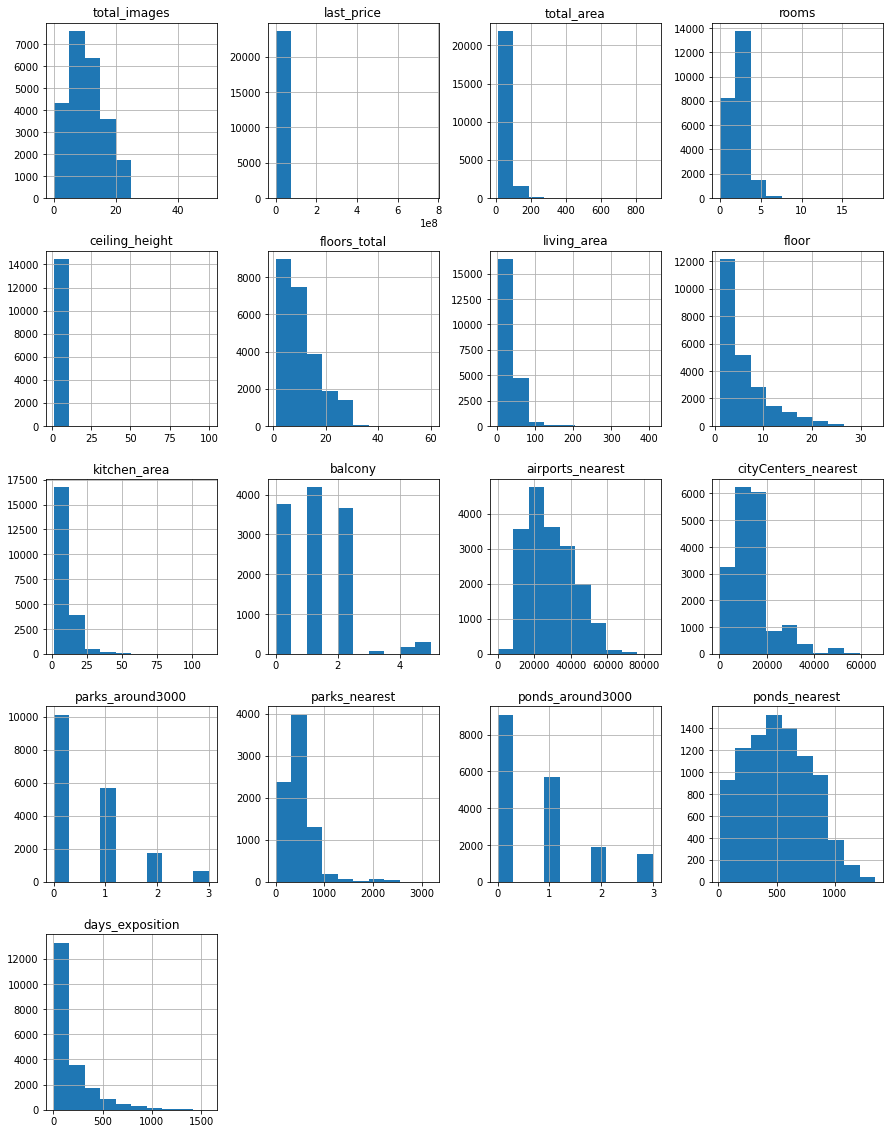

In [9]:
# построение общей гистограммы для всех столбцов таблицы
data.hist(figsize=(15, 20))
# вызов метода show() для удаления технической строчки
plt.show()


Вывод. Исследуемый DF содержит данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
DF содержит раpные типы данных: str - строчные, int, float - численные, bool - булевы. 
Дубликатов в датасете в результате проверке не обнаружено.

### Предобработка данных

**2.1 Найдти и изучить пропущенные значения в столбцах**

In [10]:
data.isna().sum() #определим в каких столбцах есть пропуски метом isna() и sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.2 Заполнить пропущенные значения там, где это возможно.**

In [11]:
#произведем замену пустых значений в столбе балконы на 0,
#если продавец не указал число балконов, то, скорее всего,   
#в его квартире их нет.
data['balcony'] = data['balcony'].fillna(0)

Вероятная причина появления пропусков в столбце с балконами - человеческий фактор. При размещение объявления продавец не указал число балконов, вероятно, что их в квартире нет. Возможна техническая причина, при заполнении объявления нет проверки на пустые поля.

Заполним столбцы living_area и kitchen_area по медианными значениями разбив на группы по количеству комнат и применив лямбда-функцию

In [12]:
data['living_area'] = data.groupby(['rooms'])['living_area'].transform(lambda x: x.fillna(x.median()))
data['kitchen_area'] = data.groupby(['rooms'])['kitchen_area'].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**2.3 Найти столбцы, в которых нужно изменить тип данных. Преобразовать тип данных в выбранных столбцах.**

In [13]:
data['is_apartment'] = data['is_apartment'].astype('bool') #Заменим тип данных object в столбце 'is_apartment' на логический тип с помощью метода astype().
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Необходимость изменить тип данных в столбце датафрема связана с минимизацией ошибок в дальнейшей работе. Именно типы данных определяют, как в разных случаях будет работать одна и та же операция. Некоторые операции работают только с определёнными типами данных.

**2.4 Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты**

In [14]:
data['locality_name'].unique() # поиск неявных дубликатов методом unique() в названии населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
data['locality_name'].duplicated().sum() # проверка на явные дубликаты методом duplicated()

23334

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # замена в обозначении пунктов ё на е
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок') # замена в обозначении населенных пунктов поселок городского типа на поселок
data['locality_name'].duplicated().sum()

23369

Количество дубликатов увеличилось, следовательно нам удалось произвести замену в строках.

**2.5 Найти и устранить редкие и выбивающиеся значения**

In [17]:
data['ceiling_height'].unique() # поиск неявных дубликатов методом unique() в столбце высота потолков

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [18]:
# в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Предположим, что на самом деле это вещественные значения: 2.5 м и 3.2 м
# произведем логическую индексацию значений больше 10м с помощью атрибута loc, выполним деление на 10 
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10 
data['ceiling_height'].unique() # проверка на уникальность 

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [19]:
#  заполним пропуски в столбце ceiling_height медианными значениями
for t in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Проверим объем значений в столбце 'высота потолков'.

In [20]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Построим диаграмму boxplot для значений 'высота потолков'.

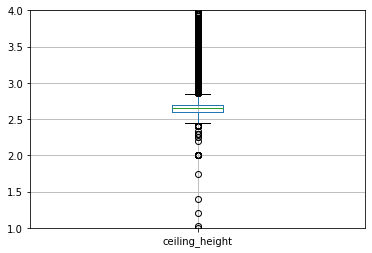

In [21]:
data.boxplot(column='ceiling_height')
plt.ylim(1, 4)
plt.show()

Значения межквартильного размаха IOR лежат в пределах 2,5 - 2,85м, но мы не можем считать, что за пределами данных значений находятся выбросы. Например, есть элитная недвижимость или дома "сталенки" где высота потолков более 3м. 
Удалим выбивающиеся значения для потолков меньше 2,4м и больше 6м.

In [22]:
data = data.loc[(data['ceiling_height'] > 2.4)&(data['ceiling_height'] < 6)] #Удалим выбивающиеся значения для потолков меньше 2,4м и больше 6м.

In [23]:
data['ceiling_height'].describe()

count    23644.000000
mean         2.697538
std          0.219441
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

Объем исключаемых данных составил менее 10%, что считается приемлемым уровнем при работе с очисткой данных.

Проверим объем значений в столбце 'living_area'.

In [24]:
data['living_area'].describe()

count    23644.000000
mean        34.328889
std         21.704923
min          2.000000
25%         18.400000
50%         30.370000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Удалим выбивающиеся значения для жилой площади меньше 7 метров. Официально зарегистрированная квартира в РФ площадью 6,6 м2.

In [25]:
data = data.loc[(data['living_area'] > 7)] # Удалим выбивающиеся значения для жилой площади меньше 7 метров

Проверим объем исключаемых значений в столбце 'living_area'.

In [26]:
data['living_area'].describe()

count    23636.000000
mean        34.339116
std         21.701452
min          8.000000
25%         18.400000
50%         30.400000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Объем исключаемых данных меньше 1%.

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              195
balcony                     0
locality_name              49
airports_nearest         5517
cityCenters_nearest      5494
parks_around3000         5493
parks_nearest           15582
ponds_around3000         5493
ponds_nearest           14548
days_exposition          3174
dtype: int64

Проверим размещение объявления на сайте в днях с аномальными значениями. 

In [29]:
data['days_exposition'].describe() # найдем размещение на сайте в днях с аномальным значением 

count    20462.000000
mean       181.027368
std        219.914554
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [30]:
data['days_exposition'] = data['days_exposition'].fillna(0) # заполним пропуски заглушками (служебными значениями)

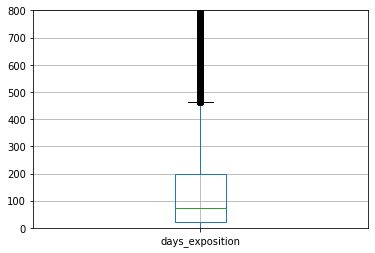

In [31]:
data.boxplot(column='days_exposition')
plt.ylim(0, 800)
plt.show()

Размещение на сайте не может быть меньше 0 и больше 1,5 межквартильного размаха.
«Усы» простираются вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха. В размах «усов» попадают нормальные значения, а за пределами находятся выбросы. Отбросим значение больше 1,5 межквартильного размаха.

In [32]:
data = data.loc[data['days_exposition'] < data['days_exposition'].quantile(0.99)] # Отбросим значения размещения объявления на сайте более  1,5 межквартильного размаха.

Проверим объем исключаемых значений в столбце 'days_exposition'.

In [33]:
data['days_exposition'].describe() 

count    23399.000000
mean       146.206505
std        186.967884
min          0.000000
25%         22.000000
50%         72.000000
75%        192.000000
max       1043.000000
Name: days_exposition, dtype: float64

In [34]:
data['days_exposition'].isna().sum()

0

Объем исключаемых данных меньше 1%.

In [35]:
#проверка площадей
sum_area = data['living_area'] + data['kitchen_area']
check_area = data['total_area'] / sum_area
check_area.describe()

count    23204.000000
mean         1.352783
std          0.223733
min          0.487988
25%          1.265823
50%          1.333333
75%          1.413174
max         18.547297
dtype: float64

Проверим объем значений в столбце 'total_area'.

In [36]:
data['total_area'].describe()

count    23399.000000
mean        60.159106
std         35.361560
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

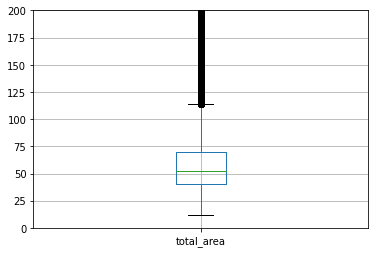

In [37]:
data.boxplot(column='total_area')
plt.ylim(0, 200)
plt.show()

In [38]:
data = data.loc[(data['total_area'] > 12)&(data['total_area'] < 631)] # Удалим выбивающиеся значения для общей площади. 
# На рынке недвижимости Санкт-Петербурга самая большая квартира имеет площадь 631 квадратный метр,
# а самая маленькая – 12 квадратных метров.

In [39]:
data['total_area'].describe()

count    23395.000000
mean        60.076457
std         34.533020
min         13.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        618.000000
Name: total_area, dtype: float64

Объем исключаемых данных меньше 1%.

Проверим объем значений в столбце 'last_price'.

In [40]:
data['last_price'].describe()

count    2.339500e+04
mean     6.479995e+06
std      1.044177e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

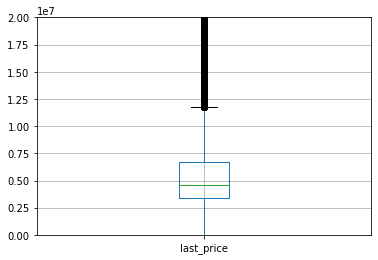

In [41]:
data.boxplot(column='last_price')
plt.ylim(0, 20000000)
plt.show()

In [42]:
data['total_area'].min() # минимальная общая плащадь

13.0

Исключим выбросы для суммы продажи менее 260000 руб., по данным за 2018 год минимальная стоимость квадратного метра в Санкт-Петербурге составляла 21000 рублей, минимальная площадь квартиры 13 м2.

In [43]:
data = data.loc[(data['last_price'] > data['total_area'].min() * 21000)]
data.head(20)           

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,True,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,True,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.00,9,True,...,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,True,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,True,...,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,True,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.50,22,True,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,True,...,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,True,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [44]:
data['last_price'].describe()

count    2.339400e+04
mean     6.480272e+06
std      1.044191e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Объем исключаемых данных меньше 1%.

Проверим объем значений в столбце 'rooms'.

In [45]:
data['rooms'].describe()

count    23394.000000
mean         2.065615
std          1.070552
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

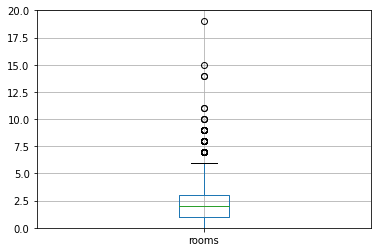

In [46]:
data.boxplot(column='rooms')
plt.ylim(0, 20)
plt.show()

Количество комнат '0' - может означать студию, либо техническую ошибку при подаче объявления (не заполнено поле кол-во комнат).
Исключать не будем.

In [51]:
rooms_count = data.groupby(['rooms']).agg({'rooms':'count'})
rooms_count

,rooms
rooms,
0,195
1,7973
2,7838
3,5734
4,1153
5,311
6,104
7,57
8,12


Количество комнат более 8 можно считать выбросами. Исключим их.

In [52]:
data = data.loc[(data['rooms'] < 9)] # Удалим выбивающиеся значения для количества комнат. 

In [53]:
data['rooms'].describe()

count    23377.000000
mean         2.059161
std          1.041104
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Объем исключаемых данных меньше 1%.

In [54]:
data['days_exposition'].describe()

count    23377.000000
mean       146.185396
std        186.892223
min          0.000000
25%         22.000000
50%         72.000000
75%        192.000000
max       1043.000000
Name: days_exposition, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

**3.1 Добавить в таблицу столбец со стоимостью 1 м2.**

In [55]:
data['meter_price'] = data['last_price'] / data['total_area'] #цена одного квадратного метра

**3.2 Добавить в таблицу столбец показывающий день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [56]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M') # добавление дня недели методом to_datetime()
data['weekday'] = data['first_day_exposition'].dt.weekday # Номер дня в неделе найдем методом dt.weekday

**3.3 Добавить в таблицу столбец с данными по месяцу размещения объявления**

In [57]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц найдем с помощью атрибута month pd.DatetimeIndex

**3.4 Добавить в таблицу столбец с данными по году размещения объявления**

In [58]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # месяц найдем с помощью атрибута year pd.DatetimeIndex

**3.5 Добавить в таблицу столбец с указанием типа этажа квартиры (значения — «первый», «последний», «другой»)**

In [59]:
def floor_number(row): # создадим функцию floor_number
    if row['floor'] == 1: # добавим логическое условие для сортировки этажей
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# добавим значение которое возвращаем функция в созданный столбец
# чтобы на вход в функцию отправлялись строки, нужно указать параметр axis = 1 функции apply
data['floor_category'] = data.apply(floor_number, axis=1) 


**3.6 Добавить в таблицу столбец с расстоянием до центра города в километрах**

In [60]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 # переведем расстояние из м в км и округлите до целых значений
try:
    data.loc[data['cityCenters_nearest'] > 1, 'cityCenters_nearest'] = data['cityCenters_nearest_km'] # логическая индексация с условием на не пустые ячейки
except:
    pass

Округлим расстояние до целых значений.

In [61]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

### Проведите исследовательский анализ данных

**4.1.1 Изучить параметры объектов: общая площадь и жилая площадь**

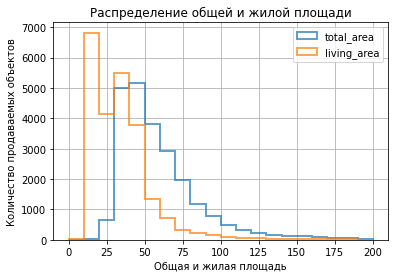

In [62]:
ax = data['total_area'].plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=20,
    linewidth=2,
    alpha=0.7,
    label='total_area',
    legend=True,
)

data['living_area'].plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 200),
    bins=20,
    linewidth=2,
    alpha=0.7,
    label='living_area',
    grid=True,
    legend=True
) #Построение общей гистограммы для жилой площади и общей площали
ax.set_title('Распределение общей и жилой площади')
plt.xlabel('Общая и жилая площадь'),
plt.ylabel('Количество продаваемых объектов')
plt.show()

Согласно гистограмме максимальное количество продаваемой недвижимости общей площадью от 30 до 60 м2. Жилая площадь от 10 до 50 м2.

**4.1.2 Изучить параметры объектов: площадь кухни**

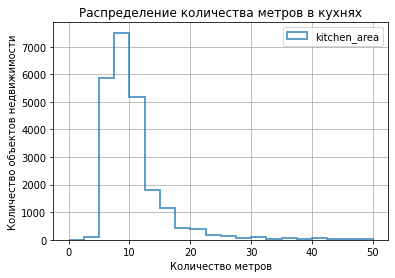

In [63]:
kitchen_area_plug = data.loc[(data['kitchen_area'] != 0)]
kitchen_area_plug.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    range=(0, 50),
    bins=20,
    linewidth=2,
    alpha=0.7,
    grid=True,
    legend=True,
) #Построение общей гистограммы для площади кухни

plt.title('Распределение количества метров в кухнях')
plt.xlabel('Количество метров')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Согласно гистограмме максимальное количество продаваемой недвижимости с площадью кухни от 5 до 12 м2.

**4.1.3 Изучить параметры объектов: цена**

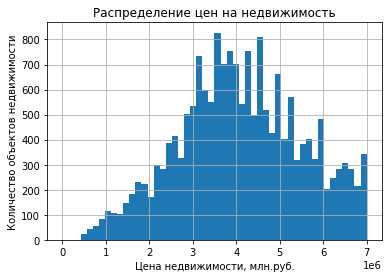

In [64]:
data['last_price'].hist(bins = 50, range=(0, 7000000)) 
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена недвижимости, млн.руб.')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Согласно гистограмме максимальное количество продаваемой недвижимости в ценовом диапазоне от 2,8 до  5,2 миллионов. 
Есть данные резко выбивающие из общей ценовой категории, но тут надо учитывать ряд дополнительных факторов (близость к центру и проч.)

**4.1.4 Изучить параметры объектов: количество комнат**

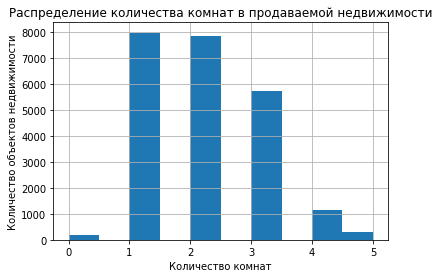

In [65]:
data['rooms'].hist(bins = 10, range=(0, 5))
plt.title('Распределение количества комнат в продаваемой недвижимости')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Согласно гистограмме большинство продаваемой недвижимости это 1 и 2 комнатные квартиры.

**4.1.5 Изучить параметры объектов: высота потолков**

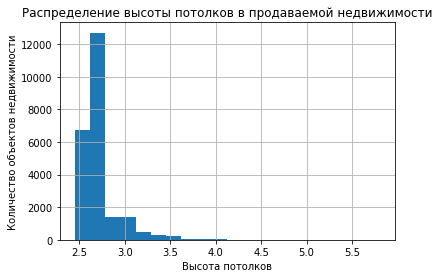

In [66]:
data['ceiling_height'].hist(bins = 20)
plt.title('Распределение высоты потолков в продаваемой недвижимости')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости имеет высоту потолков 2,6 - 2,75 м.

**4.1.6 Изучить параметры объектов: этаж квартиры**

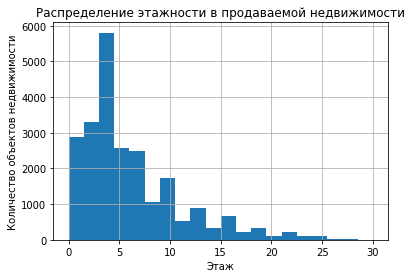

In [67]:
data['floor'].hist(bins = 20, range=(0, 30))
plt.title('Распределение этажности в продаваемой недвижимости')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости размещается между 1 и 7 этажами. Наблюдается максимальное кол-во продаваемой недвижимости размещаемой 3-4 этаже.

**4.1.7  Изучить параметры объектов: тип этажа квартиры («первый», «последний», «другой»)**

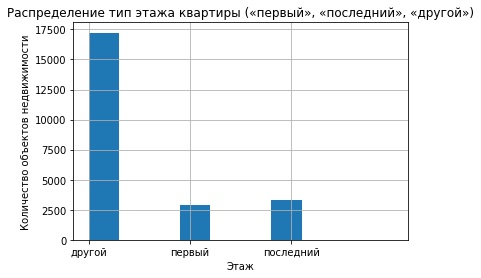

In [68]:
data['floor_category'].hist(range=(0, 3))
plt.title('Распределение тип этажа квартиры («первый», «последний», «другой»)')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Максимальное кол-во жилья с типом этажа "другой", т.е. не первый и не последний этаж, что очевидно.

**4.1.8 Изучить параметры объектов: общее количество этажей в доме**

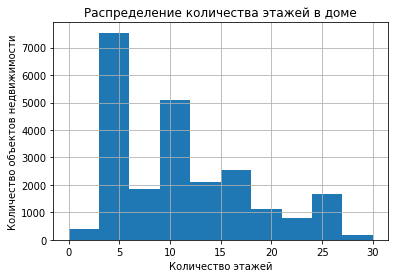

In [69]:
data['floors_total'].hist(bins = 10, range=(0, 30))
plt.title('Распределение количества этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости размещается в домах с 3-5, 9-12 этажной застройке.

**4.1.9 Изучить параметры объектов: расстояние до центра города в метрах**

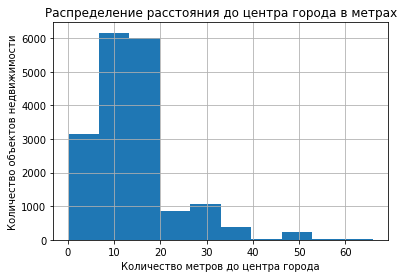

In [70]:
data['cityCenters_nearest'].hist(bins = 10)
plt.title('Распределение расстояния до центра города в метрах')
plt.xlabel('Количество метров до центра города')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости находится на удалении 8000 - 190000 м от центра города.

**4.1.10 Изучить параметры объектов: расстояние до ближайшего аэропорта**

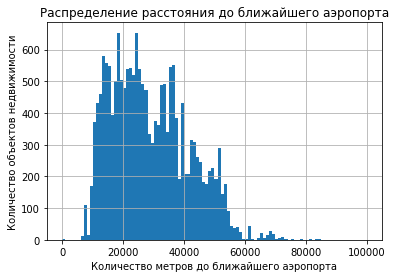

In [71]:
data['airports_nearest'].hist(bins = 100, range=(0, 100000))
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Количество метров до ближайшего аэропорта')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости находится на удалении 10000 м до 39000 м от аэропорта.

**4.1.11 Изучить параметры объектов: расстояние до ближайшего парка**

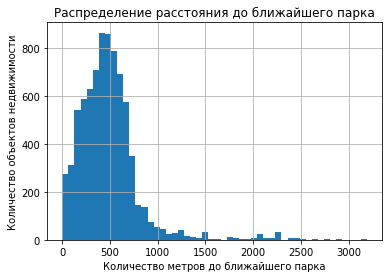

In [72]:
data['parks_nearest'].hist(bins = 50)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Количество метров до ближайшего парка')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Подавляющее большинство продаваемой недвижимости находится на удалении 200 - 700м от парка.

**4.1.13 Изучить параметры объектов: день публикации объявления**

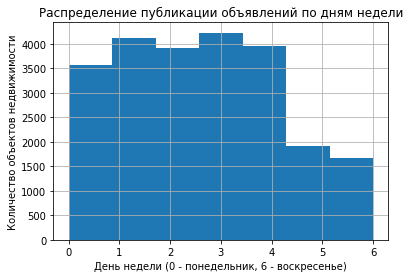

In [73]:
data['weekday'].hist(bins = 7)
plt.title('Распределение публикации объявлений по дням недели')
plt.xlabel('День недели (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Активнее объявления выкладывают в будни

**4.1.14 Изучить параметры объектов: месяц публикации объявления**

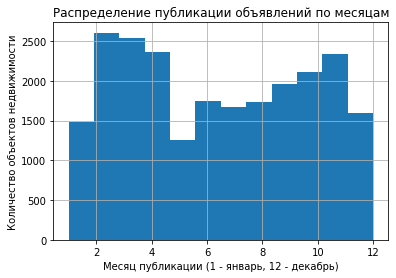

In [74]:
data['month'].hist(bins = 12)
plt.title('Распределение публикации объявлений по месяцам')
plt.xlabel('Месяц публикации (1 - январь, 12 - декабрь)')
plt.ylabel('Количество объектов недвижимости')
plt.show()

Активнее объявления выкладывают в период с февраля по апрель. Заметен спад к маю и дальнейший увеличение активности в летние и осенние месяцы.

**4.2 Изучить как быстро продавалась недвижимость. Сколько дней было размещено каждое объявление**

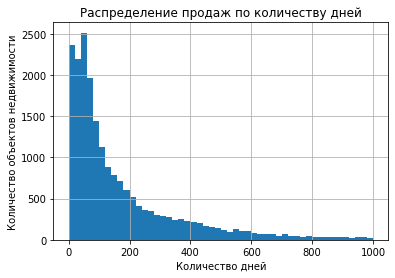

In [77]:
days_exposition_without_null = data.loc[data['days_exposition'] != 0, 'days_exposition']
days_exposition_without_null.hist(bins = 50, range=(0, 1000))
plt.title('Распределение продаж по количеству дней')
plt.xlabel('Количество дней')
plt.ylabel('Количество объектов недвижимости')
plt.show()

In [78]:
days_exposition_without_null.describe() # найдем размещение на сайте в днях с аномальным значением 
#data['days_exposition'].describe() 

count    20211.000000
mean       169.084954
std        191.123784
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1043.000000
Name: days_exposition, dtype: float64

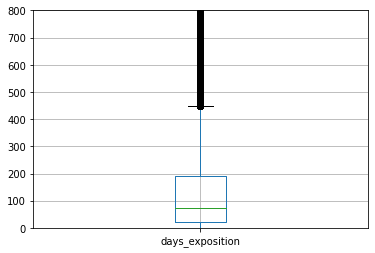

In [79]:
data.boxplot(column='days_exposition')
plt.ylim(0, 800)
plt.show()

In [80]:
days_exposition_count = (data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)) * 1.5
# размещения объявления на сайте более 1,5 межквартильного размаха можно считать выбросами
days_exposition_count = days_exposition_count + data['days_exposition'].quantile(0.75)
days_exposition_count

447.0000000000001

Среднее время продажи недвижимости 169 дня, медианное 93 день. Размещение на сайте не может быть меньше 0 и больше 1,5 межквартильного размаха. «Усы» простираются вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха. В размах «усов» попадают нормальные значения, а за пределами находятся выбросы.
Быстрыми продажами можно считать продажи за 1 день, необычно долгими -  продажи более 447 дней.

**4.3 Факторы которые больше всего влияют на общую (полную) стоимость объекта**

**4.3.1 Зависит ли цена от общей площади?**

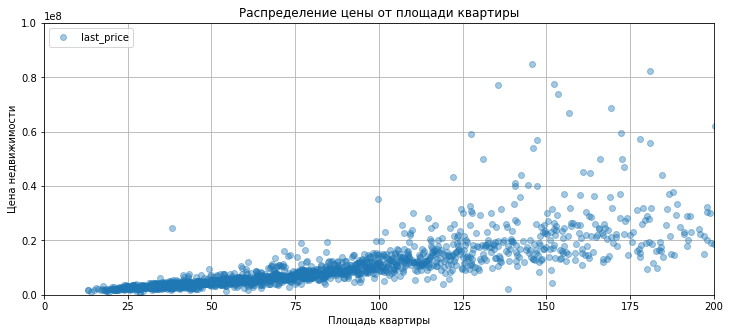

In [81]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(xlim=(0, 200), ylim=(0, 100000000), style='o', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение цены от площади квартиры')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена недвижимости')
plt.show()

Оценим взаимосвязь между общей площадью объекта недвижимости и ценой с помощью коэффициента корреляции использовать график типа heatmap.

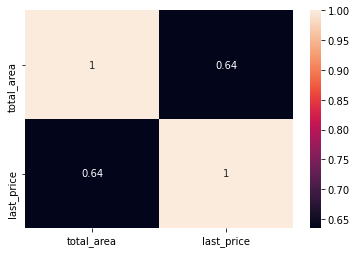

In [82]:
import seaborn as sn
part_df = data[['total_area', 'last_price']]
df = pd.DataFrame(part_df)

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Оценим взаимосвязь между параметрами:
- общей площадью объекта недвижимости
- жилой площадью
- площадью кухни
- количеством комнат<br>и ценой недвижимости с помощью коэффициента корреляции использовать график типа heatmap.

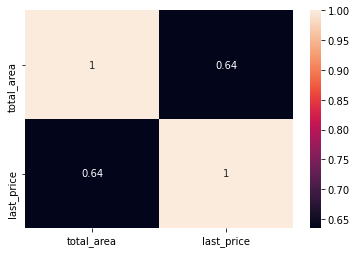

In [84]:
import seaborn as sn
part_df = data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']]

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Коэффициент корреляции между общей площадью и ценой продажи - 0,61. Линейная зависимость площади квартир и цены. Актуально для большинства недвижимости до 100м2.

**4.3.2 Зависит ли цена от жилой площади?**

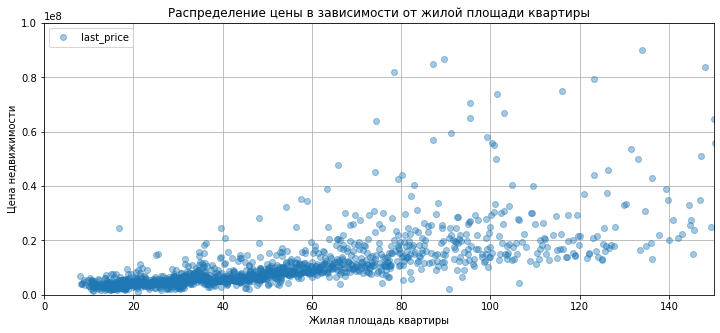

In [85]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(xlim=(0, 150), ylim=(0, 100000000), style='o', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от жилой площади квартиры')
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между жилой площадью и ценой продажи - 0,54.
Линейная зависимость жилой площади квартир и цены. Актуально для большинства недвижимости с жилой площадью до 70м2.

**4.3.3 Зависит ли цена от площади кухни?**

In [86]:
data['kitchen_area'].describe()

count    23182.000000
mean        10.422704
std          5.536410
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

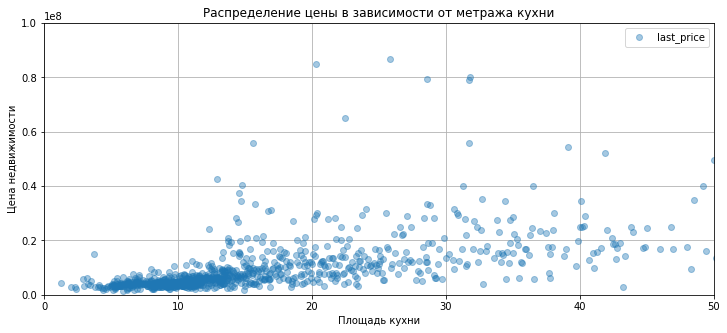

In [87]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(xlim=(0, 50), ylim=(0, 100000000), style='o', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от метража кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между площадью кухни и ценой продажи - 0,49.
Линейная зависимость площади кухни и цены прослеживается до 15м2.
Площадь кухни меньше завязана на цене чем, например, общая площадь.

**4.3.4 Зависит ли цена от количества комнат?**

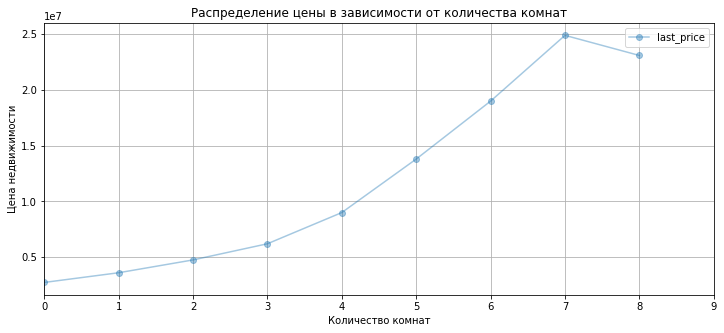

In [88]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(xlim=(0, 9), style='o-', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между количеством комнат и ценой продажи - 0,34.
Цена слабо зависит от количества комнат.

**4.3.5 Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)?**

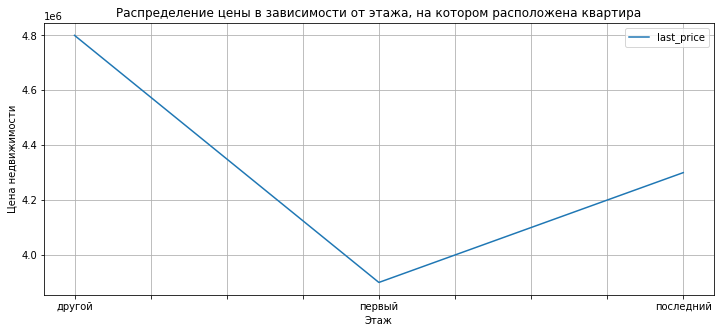

In [89]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от этажа, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Цена недвижимости')
plt.show()

Цены на квартиры на первом этаже заметно меньше.

**4.3.6 Зависит ли цена от даты размещения (день недели, месяц, год)?**

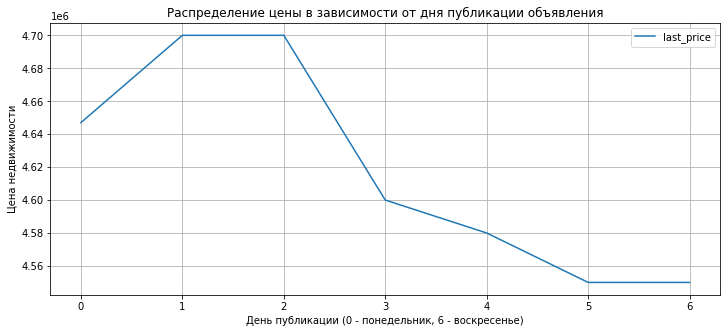

In [90]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от дня публикации объявления')
plt.xlabel('День публикации (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между днем публикации объявления и ценой продажи - 0,0043. Связь слабая. Пик продаж недвижимости публикуемой в четверг.

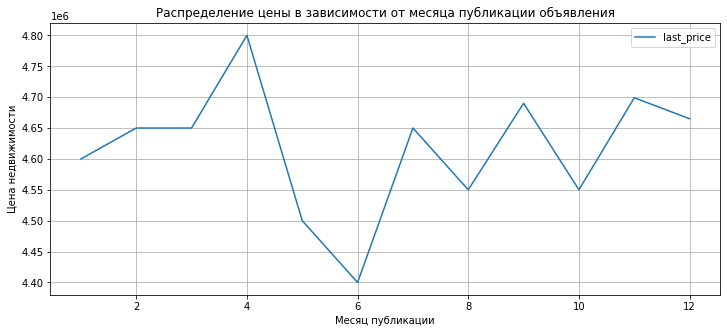

In [91]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от месяца публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между месяцем публикации объявления и ценой продажи - 0,0018. Связь слабая.

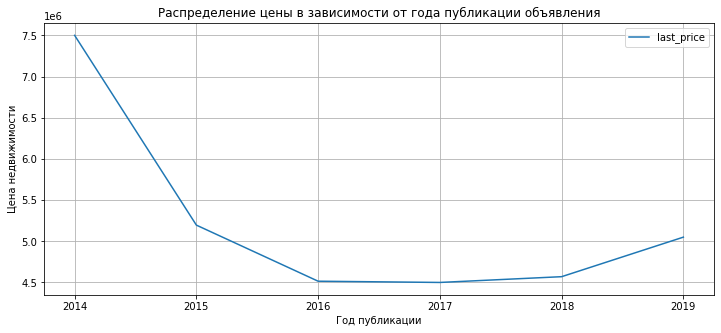

In [92]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение цены в зависимости от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Цена недвижимости')
plt.show()

Коэффициент корреляции между годом публикации объявления и ценой продажи - 0,0049. Связь слабая.

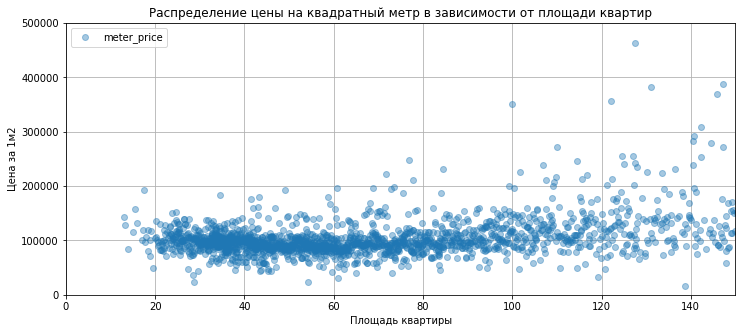

In [93]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='total_area', values='meter_price', aggfunc='median').plot(xlim=(0, 150), ylim=(0, 500000), style='o', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение цены на квадратный метр в зависимости от площади квартир')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена за 1м2')
plt.show()

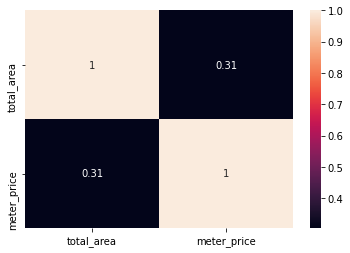

In [94]:
meter_sale = data[['total_area', 'meter_price']]
df = pd.DataFrame(meter_sale)

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Коэффициент корреляции между ценой на 1м2 и площадью квартир - 0,3. Цена за 1м2 мало зависит от площади квартиры.

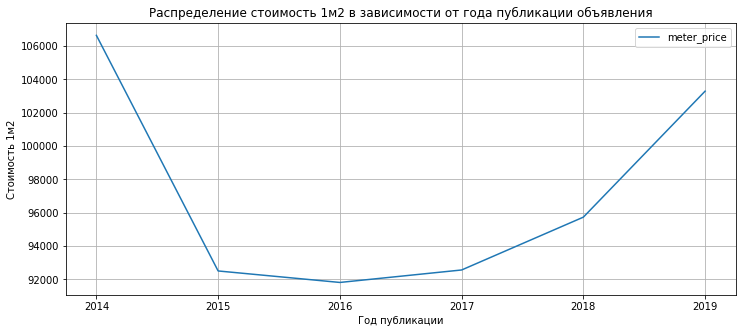

In [95]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='year', values='meter_price', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение стоимость 1м2 в зависимости от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Стоимость 1м2')
plt.show()

Наблюдается снижение стоимости 1м2 в период с 2014 по 2015 год и плавный рост к 2019 году.

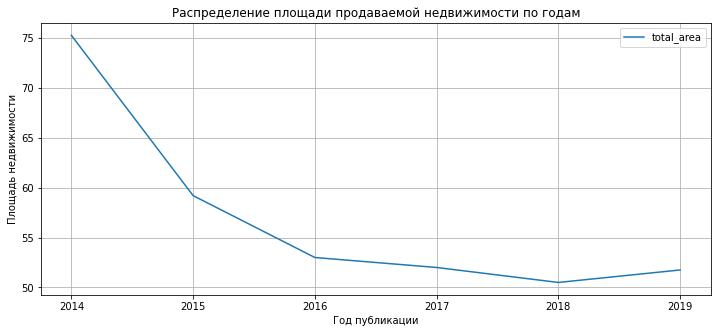

In [96]:
# используем сводную таблицу перед посторением графика
data.pivot_table(index='year', values='total_area', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.title('Распределение площади продаваемой недвижимости по годам')
plt.xlabel('Год публикации')
plt.ylabel('Площадь недвижимости')
plt.show()

Площадь продаваемой недвижимости уменьшается с каждым годом.

**4.4 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [97]:
# используем сводную таблицу для выборки 10 населённых пунктах с наибольшим числом объявлений
# сортировка функий sort_values() по убыванию
data_ten = data.pivot_table(index='locality_name', values='meter_price', aggfunc={'median', 'count'}).sort_values(by = 'count', ascending=False).head(10)
data_ten

,count,median
locality_name,,
Санкт-Петербург,15487,104724.409449
поселок Мурино,552,86059.293995
поселок Шушары,438,76747.967480
Всеволожск,395,65789.473684
Пушкин,359,100000.000000
Колпино,335,74722.222222
поселок Парголово,326,91579.708641
Гатчина,307,67796.610169
деревня Кудрово,295,91803.278689


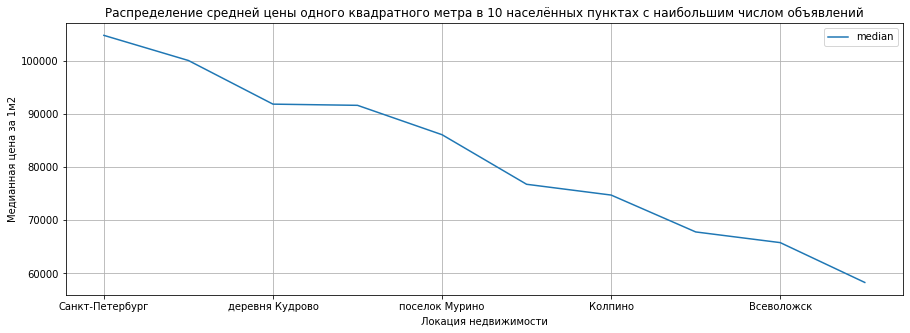

In [98]:
data_viev = data.pivot_table(index='locality_name', values='meter_price', aggfunc={'median', 'count'}).sort_values(by = 'count', ascending=False).head(10)
data_viev = data_viev.sort_values(by = 'median', ascending=False) 
data_viev.plot(y='median', grid=True, figsize=(15, 5))
plt.title('Распределение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Локация недвижимости')
plt.ylabel('Медианная цена за 1м2')
plt.show()

In [186]:
data_ten.median() # посчитаем среднюю стоимость м2 для выборки 10 населённых пунктах с наибольшим числом объявлений

count       347.000000
median    81403.630737
dtype: float64

Средняя стоимость 1м2 для выборки 10 населённых пунктах с наибольшим числом объявлений - 81403.

In [187]:
data_ten.head(1)

,count,median
locality_name,,
Санкт-Петербург,15487,104724.409449


Самая высокая стоимость 1м2 для выборки 10 населённых пунктах с наибольшим числом объявлений в Санкт-Петербурге.

In [188]:
#data.pivot_table(index='locality_name', values='meter_price', aggfunc={'mean', 'count'}).sort_values(by = 'count', ascending=False).tail(1)
data_ten.tail(1)

,count,median
locality_name,,
Выборг,235,58307.692308


Самая низкая стоимость 1м2 для выборки 10 населённых пунктах с наибольшим числом объявлений в Выборге.

**4.5 Вычислить среднюю цену каждого километра до центра (для квартир в Санкт-Петербурге)**

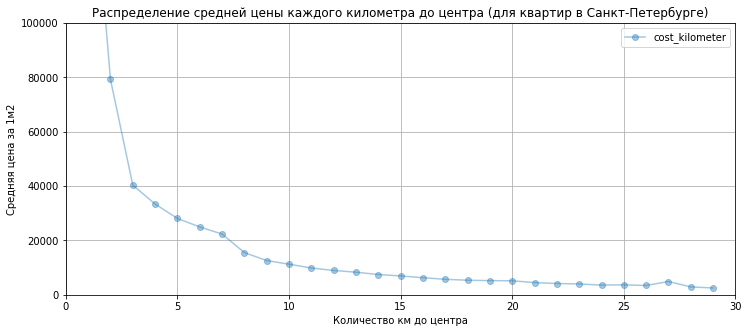

In [189]:
# стоимость км посчитаем как отношение стоимости 1м2 к расстоянию до центра
data['cost_kilometer'] = data['meter_price'] / data['cityCenters_nearest_km'] 
# срез данных по Санкт-Петербургу методом query()
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='cost_kilometer', aggfunc='mean').plot(xlim=(0, 30), ylim=(0, 100000), style='o-', alpha=0.4, grid=True, figsize=(12, 5))
plt.title('Распределение средней цены каждого километра до центра (для квартир в Санкт-Петербурге)')
plt.xlabel('Количество км до центра')
plt.ylabel('Средняя цена за 1м2')
plt.show()

In [190]:
# cредняя цена каждого километра до центра (для квартир в Санкт-Петербурге)
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='cost_kilometer', aggfunc='median').median()


cost_kilometer    7015.774621
dtype: float64

Cредняя цена каждого километра до центра (для квартир в Санкт-Петербурге) - 7015 руб.
Чем ближе недвижимость расположена к центру города, тем выше стоимость.

### Общий вывод

По результатам проведенного анализа установили, что активнее продаются квартиры:
- общей площадью от 30 до 60 м2;
- жилой площадью от 10 до 50 м2;
- площадью кухни от 5 до 12 м2;
- одна- и двухкомнатные квартиры.


Среди квартир с большими продажами есть ряд характерных особенностей присущих большинству квартир:
- высота потолков 2,6 - 2,75 м;
- квартиры на 3 и 4 этажей в  3-5, 9-12 этажной застройке;
- расстоние до центра города 8 - 19 км;
- расстояние до аэропорта 10 м до 30 км;
- рядом с парками;
- в ценовом диапазоне от 2,8 до 5,2 миллионов.

Объявление о продаже активнее вкладывают:
- в будни (пик продаж во четверг);
- с февраля по апрель (спад май и летние месяцы).

Цены на квартиры зависят от общей площади, но слабо зависят от количества комнат.
Среднее время продажи недвижимости 169 дня. Если больше, то логично предположить, что цена оказалась завышенной.
Цены на квартиры на первом этаже заметно меньше. Но гипотеза верна только для жилой недвижимости, обратная тенденция будет наблюдаться для коммерческой недвижимости.

Наблюдается снижение площали продаваемых квартир и рост цены за квадратный метр с 2016 года.
Гипотеза подтвердилась. Ценовая динамика соответствует реальной ситуации на рынке недвижимости за установленный период.

Чем ближе недвижимость расположена к центру города, тем выше стоимость. 
Гипотеза подтвердилась, квартиры в центре будут стоить дороже, чем на окраине.